In [1]:
from minisom import MiniSom
import sklearn.datasets
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
Dados_risco_materno = pd.read_csv('Data\\archive\Maternal Health Risk Data Set.csv')
X= Dados_risco_materno.drop(['RiskLevel'],axis = 1)
normalizador = MinMaxScaler()
X_norm= pd.DataFrame(normalizador.fit_transform(X), columns=X.columns)

labels = Dados_risco_materno.RiskLevel.unique()
Y = pd.get_dummies(Dados_risco_materno.RiskLevel)

In [3]:
sigma = 16
eta = 0.1
epocas = 1000
random_seed = 5

neighborhood_function = 'gaussian'
topology = 'rectangular'
neuD1 = 30 # número de neurônios (dimensão 01 - linhas)
neuD2 = 20 # número de neurônios (dimensao 02 - colunas)
print(epocas*len(X.values))

1014000


In [4]:
som = MiniSom(neuD1, neuD2, X_norm.shape[1],
              sigma=sigma,
              learning_rate=eta,
              neighborhood_function=neighborhood_function,
              random_seed=random_seed)
q_error = []
t_error = []


som.random_weights_init(X_norm.values)
som.train_random(X_norm.values, epocas)

print(epocas*len(X_norm.values))

1014000


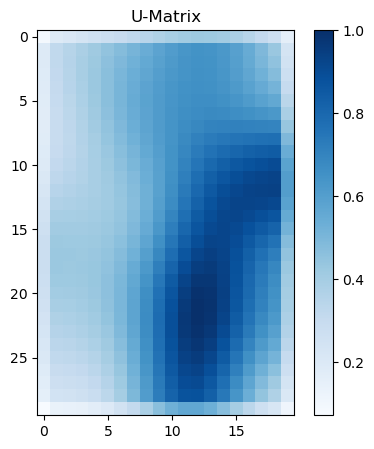

In [5]:
figure (figsize=(5,5),dpi=100)
plt.imshow(som.distance_map(), cmap='Blues')
plt.title('U-Matrix')
plt.colorbar()
plt.show()

In [6]:
Dados_risco_materno['RiskLevel'].replace(Dados_risco_materno['RiskLevel'].unique(), [0,1,2], inplace=True)
target = Dados_risco_materno['RiskLevel'].values

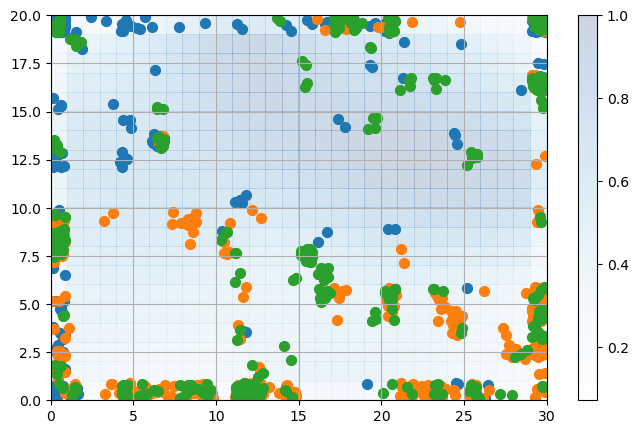

In [7]:
w_x, w_y = zip(*[som.winner(d) for d in X_norm.values])
w_x = np.array(w_x)
w_y = np.array(w_y)

figure (figsize=(8,5),dpi=100)
plt.pcolor(som.distance_map().T, cmap='Blues', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50, label=target[c])
plt.grid()
plt.show()

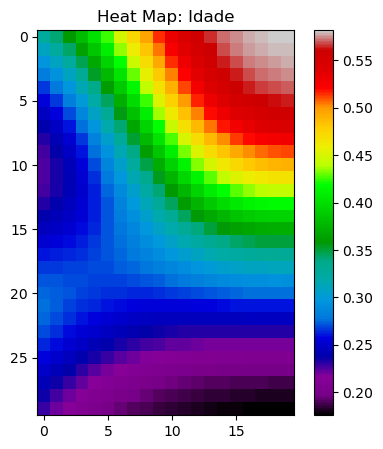

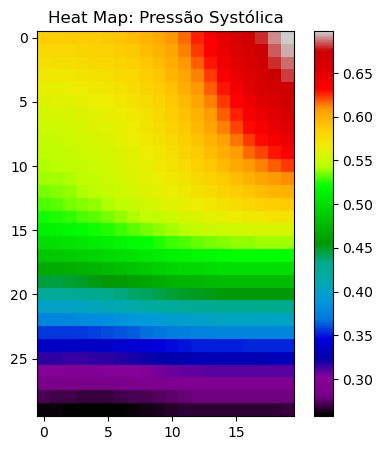

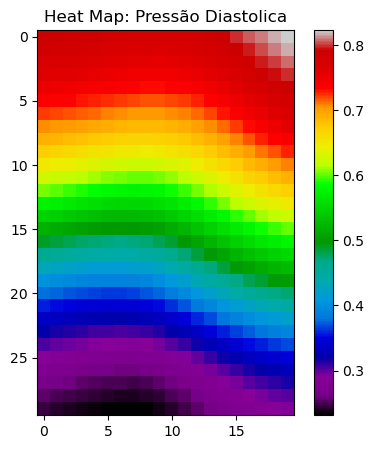

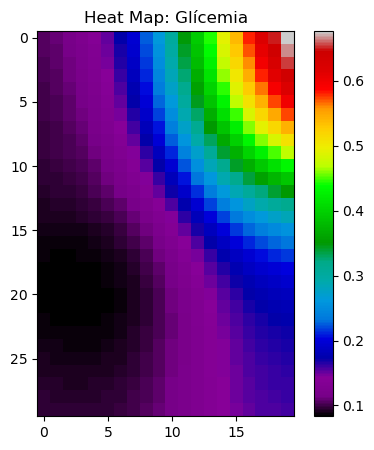

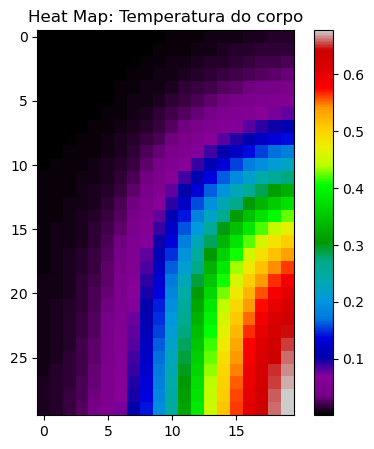

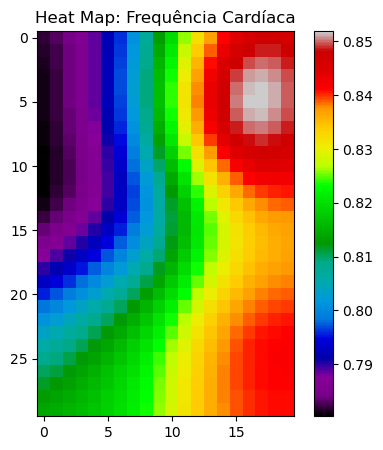

In [8]:
weights = som.get_weights()
figure (figsize=(5,5),dpi=100)
plt.title('Heat Map: Idade')
plt.imshow(weights[:, :, 0], cmap='nipy_spectral')
plt.colorbar()
plt.show()

figure (figsize=(5,5),dpi=100)
plt.title('Heat Map: Pressão Systólica')
plt.imshow(weights[:, :, 1], cmap='nipy_spectral')
plt.colorbar()
plt.show()

figure (figsize=(5,5),dpi=100)
plt.title('Heat Map: Pressão Diastolica')
plt.imshow(weights[:, :, 2], cmap='nipy_spectral')
plt.colorbar()
plt.show()

figure (figsize=(5,5),dpi=100)
plt.title('Heat Map: Glícemia')
plt.imshow(weights[:, :, 3], cmap='nipy_spectral')
plt.colorbar()
plt.show()

figure (figsize=(5,5),dpi=100)
plt.title('Heat Map: Temperatura do corpo')
plt.imshow(weights[:, :, 4], cmap='nipy_spectral')
plt.colorbar()
plt.show()

figure (figsize=(5,5),dpi=100)
plt.title('Heat Map: Frequência Cardíaca')
plt.imshow(weights[:, :, 5], cmap='nipy_spectral')
plt.colorbar()
plt.show()